<a href="https://colab.research.google.com/github/dudcoco/machine_deep_learning/blob/main/4%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 4장
# 4-1
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

In [2]:
print(pd.unique(fish['Species'])) # Species 열에서 값 추출하기

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
# 이 데이터에서 Species -> 타겟, 나머지 5개 열 -> 입력데이터
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])
# 입력 데이터 준비 완료

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [6]:
fish_target = fish['Species'].to_numpy() # 주의! [[]] 대괄호 두개 사용하면 안됨! 그럼 2차원 배열이 되어버림
# 훈련 세트, 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
# k 최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [8]:
print(kn.classes_) # 타겟값이 알파벳 순으로 순서가 정해짐

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [9]:
# 테스트 세트에 있는 처음 5개 샘플의 타겟값을 예측해보기
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [10]:
# 테스트 세트에 있는 처음 5개 샘플의 확률 출력해보기
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # decimals=4 : 소수점 넷째자리까지만 표기
# 결과 : 확률 출력 순서는 classes_ 속성의 순서와 같음

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [11]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인
# 네번째 샘플의 최근접 이웃 클래스 확인해보기
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


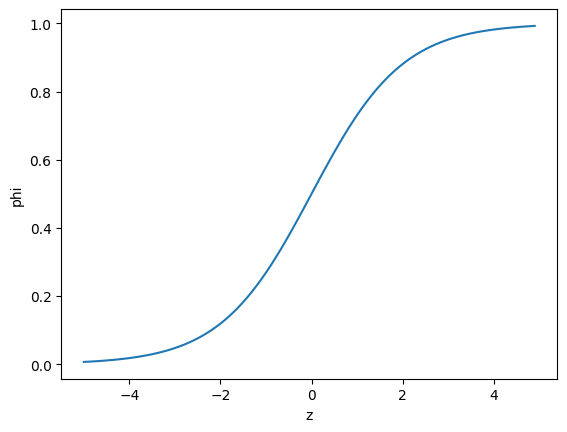

In [12]:
# 로지스틱 회귀 -> 분류 모델임.
# 시그모이드 함수 = 1 / 1+e^-z
# 시그모이드 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1) # -5부터 5 사이에 0.1 간격으로 배열 z를 만든 다음 z 위치마다 시그모이드 함수를 계산
phi = 1 / (1 + np.exp(-z)) # 지수함수 계산 np.exp()
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [15]:
# 이진 분류해보기
# 이진 분류일 경우, 시그모이드 함수값 > 0.5 이면 양성 클래스, 시그모이드 함수값 < 0.5이면 음성 클래스
# 사이킷런에서는 시그모이드 함수값 = 0.5이면 음성 클래스로 판단
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [17]:
# 위 방법 사용하여 도미(Brean)와 빙어(Smelt)만 골라내보기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [18]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# train_bream_smelt의 첫 5개 샘플 예측해보기
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [19]:
# 예측 확률
print(lr.predict_proba(train_bream_smelt[:5]))
# 결과 : 첫번째 열 = 음성 클래스(0) 확률, 두번째 열 = 양성 클래스(1) 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [20]:
print(lr.classes_)
# 결과 : 첫번째 열 = Bream(0), 두번째 열 = Smelt(1)

['Bream' 'Smelt']


In [21]:
# 로지스틱 회귀가 학습한 개수 확인
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [22]:
# train_bream_smelt의 처음 5개 샘플의 z 값 출력해보기
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [23]:
# decisions 배열값을 확률로 변환해보기
from scipy.special import expit
print(expit(decisions))

# 이진 분류 끝

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [28]:
# 로지스틱 회귀로 다중 분류 수행
# 로지스틱 회귀에서는 규제의 양 조절을 위해 C 매개변수 사용
# 릿지 회귀의 alpha 변수와 달리, C 변수는 값이 작을수록 규제가 커짐. 기본값은 1

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print("=" * 20)
print(lr.predict(test_scaled[:5])) # 첫 5개 샘플의 예측 출력

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 첫 5개 샘플의 예측 확률을 출력
print(lr.classes_)

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [29]:
# coef_, intercept_의 크기 출력해보기
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


이진 분류에서는 z값을 __시그모이드 함수__를 사용해 0~1 사이의 값으로 변환
<br>
다중 분류에서는 z값을 __소프트맥스 함수__를 사용해 n개의 z값을 확률로 변환!!!!!

- 소프트맥스 함수 : 여러개의 선형방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만듦



In [34]:
# decision_function() 메서드로 z1~z7까지의 값을 구한 후 소프트맥스 함수를 사용해 확률로 변환하기
# 테스트 세트 첫 5개 샘플에 대한 z1~z7의 값 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))
print("=" * 50)
# 소프트맥스 계산
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [35]:
# 4-2 확률적 경사 하강법
# 확률적 경사 하강법 Stocastic gradient descent : 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것
# 에포크 epoch : 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정
# 미니배치 경사 하강법 minibatch gradient descent : 여러개의 샘플을 사용해 경사 하강법을 수행하는 방식
# 배치 경사 하강법 batch gradient descent : 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 방식
# 손실 함수 loss function : 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준. 손실함수의 값이 작을수록 좋은 것. 손실함수는 미분가능해야 함



In [39]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 확률적 경사 하강법 제공하는 분류용 클래스 - SGDClassifier
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # loss='log_loss'로 지정 시 클래스마다 이진 분류 모델을 만듦. max_iter=10은 수행할 에포크 횟수가 10임을 나타냄
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [40]:
# SGDClassifier 객체를 처음부터 다시 만들지 않고, 훈련한 모델 sc를 추가로 더 훈련하기 -> partial_fit() 사용
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 언제까지 점수를 올리기 위해서 훈련을 진행해야 할까?

0.8151260504201681
0.85


In [41]:
# 조기 종료 : 과대적합이 시작하기 전에 훈련을 멈추는 것

# 에포크가 진행됨에 따른 모델의 정확도 그래프 그리기
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


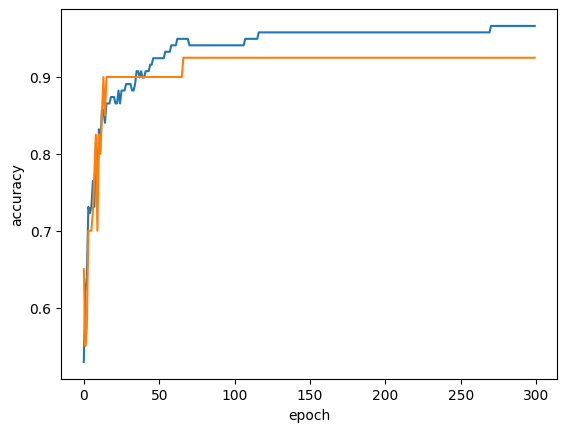

In [42]:
# 300번의 에포크 동안 훈련 반복 진행하기
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 결과 : 100번째 에포크 이후부터는 훈련 세트와 테스트 세트의 점수 격차가 벌어지고 있음 -> 100이 적절한 반복횟수임

In [45]:
# 반복횟수 100으로 맞추고 다시 훈련
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # tol=None으로 설정하여 자동으로 멈추지 않고 무조건 100만큼 반복하도록 설정함
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
